# 机器学习
## 机器学习的目标
- 基于有限训练样本集尽可能估计出后验概率$P(y|x)$

## 机器学习的两种范式
![](../img/18_17.png)

## 无监督学习
![](../img/15_1.png)

### 概率图模型
概率图模型（Probabilistic Graphical Model，PGM），简称图模型（Graph-ical Model，GM），是指一种用图结构来描述**多元随机变量之间条件独立关系**的概率模型，从而给研究高维空间中的概率模型带来了很大的便捷性。

![](../img/16_1.png)

- 表示(Representation)：将实际问题建模为图结构,即使用图结构来描述变量之间的关系。
- 推断(Inference)：推断感兴趣图节点的后验分布，即在已知部分变量时，计算其他变量的条件概率分布。
- 学习(Learning)：包括图结构的学习和参数的学习。

![](../img/16_2.png)

与一般机器学习算法一样，PGM也可分为生成式(Generative)与判别式(Discriminative)两种。假设观测为，隐变量(状态)为 S 。两种模型区别如下：
![](../img/16_3.png)


![](../img/18_18.png)

#### 1 条件概率的一般形式
$p(x^{(1)...x^{(n)}})=p(x^{(1)}\prod \limits_{i=2}^{n} p(x^{(i)}|p^{{1}}...p^{(i-1)}))$



#### 2 基于马尔科夫假设的条件概率
![](../img/18_19.png)
$p(A,B,C)=p(C|B)·(B|A)·p(A)$

#### 3 高斯分布的KL散度


#### 4 随机变量函数的期望


#### 5 重参数化技巧
重参数化技巧，就是从一个分布$p_{\theta}(z)$中进行采样，而该分布是带有参数$\theta$的，如果直接进行采样（采样动作是离散的，其不可微），是没有梯度信息的，那么在BP反向传播的时候就不会对参数梯度进行更新。重参数化技巧可以保证我们从$p_{\theta}(z)$进行采样，同时又能保留梯度信息。


# Diffusion Model
灵感来源于非平衡热力学，定义了扩散步骤的马尔可夫链，以缓慢地将随机噪声添加到数据中然后学习逆向扩散过程，以从噪声中构造所需的数据样本（还原数据分布）.

通过固定过程学习，并保持其潜在变量具有高维度

![Diffusion Model](../img/18_4.png)



## Forward diffusion process

为什么要逐步添加噪声：增加输入的多样性，从而使得输出具有鲁棒性

数据的初始分布(目标分布)：$x_{0}～q(x)$，在每个时刻向上一时刻的数据分布添加噪声。

每时刻添加的噪声服从高斯分布，其标准差以固定值$\beta_t$确定，均值以固定值$\beta_t$和当前t时刻的数据t确定。

任一时刻的数据分布$q(x_t)$推导可完全基于$x_0$和$\beta_t$来计算，不需迭代。

随着t变大，从原数据中采样的$x_0$逐渐失去它的可辨别特征；当$T\rightarrow+\infty$，$x_T$最终变成一个各自独立（isotropic）的高斯分布，即$x_T～N(0,I)$。

![Forward diffusion process](../img/18_5.png)

![Forward diffusion process](../img/18_6.png)

## Reverse diffusion process
目标：基于一个高斯噪声推出原数据分布$q(x_0)$，然后从$q(x_0)$采样出新的样本。


假设原数据也是高斯分布，但无法逐步拟合，需构造一个**参数分布**去估计后验的扩散条件概率。

前向的扩散条件概率$q(x_{t-1} | x_t,x_0)$分布是可以用公式表达的，即给定$x_t$和$x_0$，可以算出$x_{t-1}$。

通过最小化前向$q(x_{1:T}|x_0)$和反向恢复$p\theta(x_{1:T}|x_0)$的KL散度

Diffusion模型的前向过程，定义了一种简单的把数据分布映射到标准高斯的过程，使得生成器可以**直接拟合这个过程每一小步的逆过程**。因为任何分布沿着马尔科夫链一直采样下去最终都可以得到某种平稳分布。所以，这个前向过程，构造了一个平稳分布是标准高斯分布的马尔科夫链。为了最终的隐变量为高斯分布，这里的转移概率可以如图上式子这样构造。前面我们提到，变分后验的选择是生成模型的一个痛点，后验概率难做，这意味着逆向过程会很难，而diffusion模型这样的构造有一个重要特性——**前向过程的每一小步的逆过程都可以近似为高斯分布**，所以它的逆向过程也很好做。

前向过程对应的后验概率可以根据贝叶斯公式推导。

![Reverse diffusion process](../img/18_7.png)

![Reverse diffusion process](../img/18_8.png)

![Reverse diffusion process](../img/18_8_1.png)

![Reverse diffusion process](../img/18_9.png)

![Reverse diffusion process](../img/18_10.png)

![Reverse diffusion process](../img/18_11.png)

![Reverse diffusion process](../img/18_12.png)

![Reverse diffusion process](../img/18_13.png)

## Parameterization of $L_t$ for training loss

![Training Loss](../img/18_14.png)

![Training Loss](../img/18_15.png)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_s_curve
import torch

"""
生成一个样本，该样本包含10000个点，每个点的特征为2（横纵坐标组成）
"""
s_curve,_ = make_s_curve(10**4,noise=0.1)
s_curve = s_curve[:,[0,2]]/10.0  # 每个点取第0维和第2维再除以10

# print("shape of s:",np.shape(s_curve))  # shape of s: (10000, 2)

data = s_curve.T

# fig,ax = plt.subplots()
# ax.scatter(*data,color='red',edgecolor='white')
#
# ax.axis('off')

dataset = torch.Tensor(s_curve).float()  # 将其转化成一个张量，构造为数据集

# 训练集有10000个样本，每个样本有两个属性
dataset.shape

torch.Size([10000, 2])

### 2、确定超参数的值

In [5]:
num_steps = 100  # 对于步骤，一开始可以由beta、分布的均值和方差来共同决定

# 这些超参数随t改变，在每个t时刻都是常量，不需训练

# 制定每一步的beta
betas = torch.linspace(-6,6,num_steps)  # Creates a one-dimensional tensor (-6到6,step=100)
betas = torch.sigmoid(betas)*(0.5e-2 - 1e-5)+1e-5  # 生成逐步递增的beta（类似学习率）

# 计算alpha、alpha_prod、alpha_prod_previous、alpha_bar_sqrt等变量的值

alphas = 1-betas  # 结果为向量，第t个元素表示\alpha_t的值

alphas_prod = torch.cumprod(alphas,0)  # 将alphas连乘，结果为向量，第t个元素表示\bar{\alpha_t}的值

# 将1与\alpha连乘的结果（除去最后一个数）拼在一起，用来表示\alpha_{t-1}(后面没有用到这个变量)
# alphas_prod_p = torch.cat((torch.tensor([1]).float(),alphas_prod[:-1]),
                          # dim=0)  # p表示previous

alphas_bar_sqrt = torch.sqrt(alphas_prod)

# one_minus_alphas_bar_log = torch.log(1 - alphas_prod)

one_minus_alphas_bar_sqrt = torch.sqrt(1 - alphas_prod)

# assert alphas.shape==alphas_prod.shape==alphas_prod_p.shape==alphas_bar_sqrt.shape==one_minus_alphas_bar_log.shape==one_minus_alphas_bar_sqrt.shape  # assert断言，在表达式为false时出错

assert alphas.shape==alphas_prod.shape==alphas_bar_sqrt.shape==one_minus_alphas_bar_sqrt.shape

print("all the same shape",betas.shape)


all the same shape torch.Size([100])


### 3、确定扩散过程任意时刻的采样值

In [6]:
# 计算任意时刻的x采样值，基于x_0和t重参数化（公式1）
def q_x(x_0, t):
    """可以基于x[0]得到任意时刻t的x[t]"""
    noise = torch.randn_like(x_0)  # 生成一个正态分布的随机噪声
    alphas_t = alphas_bar_sqrt[t]  # 均值
    alphas_1_m_t = one_minus_alphas_bar_sqrt[t]  # 方差
    return (alphas_t * x_0 + alphas_1_m_t * noise)  # 在x[0]的基础上添加噪声


### 4、演示原始数据分布加噪100步后的结果

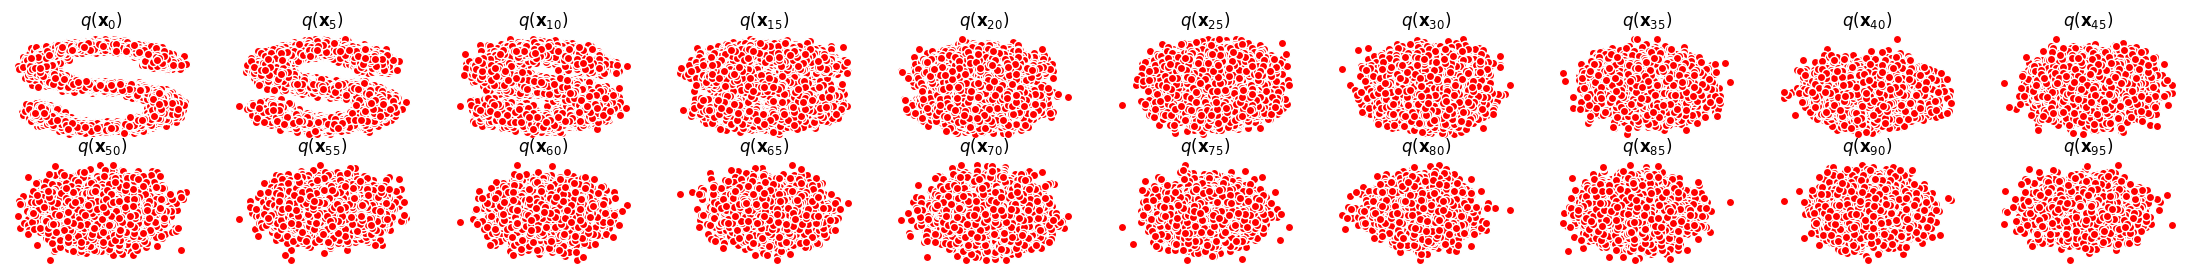

In [7]:
num_shows = 20
fig,axs = plt.subplots(2,10,figsize=(28,3))
plt.rc('text',color='black')

# 共有10000个点，每个点包含两个坐标
# 生成100步以内每隔5步加噪声后的图像
for i in range(num_shows):
    j = i // 10
    k = i % 10
    q_i = q_x(dataset,
              torch.tensor([i*num_steps // num_shows])
              )  # 生成t时刻的采样数据

    axs[j,k].scatter(q_i[:,0],q_i[:,1],color='red',edgecolor='white')
    axs[j,k].set_axis_off()
    axs[j,k].set_title('$q(\mathbf{x}_{'+str(i*num_steps//num_shows)+'})$')

In [13]:
x_99=q_x(dataset,99)
std, mean = torch.std_mean(x_99)
print(f"std: {std:.2f} , mean: {mean:.2f}，type(x_99): {type(x_99)}")

std: 0.48 , mean: -0.00，type(x_99): <class 'torch.Tensor'>


### 5、编写拟合逆扩散过程高斯分布的模型

In [5]:
"""
训练数据：torch.Size([10000, 2])，即10000个点，每个点由两个属性描述。

"""

import torch
import torch.nn as nn

class MLPDiffusion(nn.Module):
    def __init__(self,n_steps,num_units=128):

        super(MLPDiffusion,self).__init__()
        
        self.linears = nn.ModuleList(
            [
                nn.Linear(2,num_units),
                nn.ReLU(),
                nn.Linear(num_units,num_units),
                nn.ReLU(),
                nn.Linear(num_units,num_units),
                nn.ReLU(),
                nn.Linear(num_units,2),
            ]
        )

        # n_steps:100 num_units:网络的参数
        # 对时间t进行编码
        self.step_embeddings = nn.ModuleList(
            [
                nn.Embedding(n_steps,num_units),
                nn.Embedding(n_steps,num_units),
                nn.Embedding(n_steps,num_units),
            ]
        )

    def forward(self, x, t):

        for idx, embedding_layer in enumerate(self.step_embeddings):

            # 先对时间t进行编码
            t_embedding = embedding_layer(t)

            # 对数据x进行线性变换
            x = self.linears[2*idx](x)

            # 对数据x添加时间信息t
            x = x + t_embedding

            # 对带时间信息的数据进行线性变换
            x = self.linears[2*idx+1](x)
            
        x = self.linears[-1](x)
        
        return x

### 6、编写训练的误差函数

In [6]:
"""
对任意时刻t进行采样计算loss
"""

def diffusion_loss_fn(model,x_0,alphas_bar_sqrt,one_minus_alphas_bar_sqrt,n_steps):

    batch_size = x_0.shape[0]
    
    # 对一个batchsize样本生成随机的时刻t，覆盖到更多不同的t
    t = torch.randint(0,n_steps,size=(batch_size//2,))
    # t.shape = [batchsize]
    t = torch.cat([t,n_steps-1-t],dim=0)
    # t.shape = [batchsize,1] (升维)
    t = t.unsqueeze(-1)

    print(t,t.shape)

    
    # x0的系数
    a = alphas_bar_sqrt[t]
    
    # eps的系数
    aml = one_minus_alphas_bar_sqrt[t]
    
    # 生成随机噪音eps，形状与样本相同
    e = torch.randn_like(x_0)
    
    # 构造模型的输入
    x = x_0*a+e*aml
    
    # 送入模型，得到t时刻的随机噪声预测值
    output = model(x,t.squeeze(-1))
    
    # 与真实噪声一起计算误差，求平均值
    return (e - output).square().mean()

### 7、编写逆扩散采样函数（inference）

In [7]:
def p_sample_loop(model,shape,n_steps,betas,one_minus_alphas_bar_sqrt):
    """从x[T]恢复x[T-1]、x[T-2]|...x[0]"""
    cur_x = torch.randn(shape)
    x_seq = [cur_x]
    for i in reversed(range(n_steps)):
        cur_x = p_sample(model,cur_x,i,betas,one_minus_alphas_bar_sqrt)
        x_seq.append(cur_x)
    return x_seq

# 单步采样
def p_sample(model,x,t,betas,one_minus_alphas_bar_sqrt):
    """从x[T]采样t时刻的重构值"""
    t = torch.tensor([t])
    
    coeff = betas[t] / one_minus_alphas_bar_sqrt[t]
    
    eps_theta = model(x,t)
    
    mean = (1/(1-betas[t]).sqrt())*(x-(coeff*eps_theta))
    
    z = torch.randn_like(x)
    sigma_t = betas[t].sqrt()
    
    sample = mean + sigma_t * z
    
    return (sample)

### 8、开始训练模型，打印loss及中间重构效果

Training model...
tensor(0.8708, grad_fn=<MeanBackward0>)


/home/zhang/anaconda3/envs/pytorch/lib/python3.10/site-packages/torch/autograd/__init__.py:197: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


tensor(0.5286, grad_fn=<MeanBackward0>)
tensor(0.3959, grad_fn=<MeanBackward0>)
tensor(0.1639, grad_fn=<MeanBackward0>)
tensor(0.1691, grad_fn=<MeanBackward0>)
tensor(0.3365, grad_fn=<MeanBackward0>)
tensor(0.2633, grad_fn=<MeanBackward0>)
tensor(0.3647, grad_fn=<MeanBackward0>)
tensor(0.2899, grad_fn=<MeanBackward0>)
tensor(0.1776, grad_fn=<MeanBackward0>)
tensor(0.5595, grad_fn=<MeanBackward0>)
tensor(0.1262, grad_fn=<MeanBackward0>)
tensor(0.2040, grad_fn=<MeanBackward0>)
tensor(0.3495, grad_fn=<MeanBackward0>)
tensor(0.2867, grad_fn=<MeanBackward0>)
tensor(0.5762, grad_fn=<MeanBackward0>)
tensor(0.3863, grad_fn=<MeanBackward0>)
tensor(0.1386, grad_fn=<MeanBackward0>)
tensor(0.5237, grad_fn=<MeanBackward0>)
tensor(0.1957, grad_fn=<MeanBackward0>)
tensor(0.4723, grad_fn=<MeanBackward0>)


/tmp/ipykernel_112511/3808553706.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axs = plt.subplots(1,10,figsize=(28,3))


tensor(0.2938, grad_fn=<MeanBackward0>)
tensor(0.5221, grad_fn=<MeanBackward0>)
tensor(0.2374, grad_fn=<MeanBackward0>)
tensor(0.3830, grad_fn=<MeanBackward0>)
tensor(0.1553, grad_fn=<MeanBackward0>)
tensor(0.5733, grad_fn=<MeanBackward0>)
tensor(0.1731, grad_fn=<MeanBackward0>)
tensor(0.2717, grad_fn=<MeanBackward0>)
tensor(0.3656, grad_fn=<MeanBackward0>)
tensor(0.6059, grad_fn=<MeanBackward0>)
tensor(0.2913, grad_fn=<MeanBackward0>)
tensor(0.2784, grad_fn=<MeanBackward0>)
tensor(0.2187, grad_fn=<MeanBackward0>)
tensor(0.2708, grad_fn=<MeanBackward0>)
tensor(0.3746, grad_fn=<MeanBackward0>)
tensor(0.2424, grad_fn=<MeanBackward0>)
tensor(0.3963, grad_fn=<MeanBackward0>)
tensor(0.1629, grad_fn=<MeanBackward0>)
tensor(0.4309, grad_fn=<MeanBackward0>)


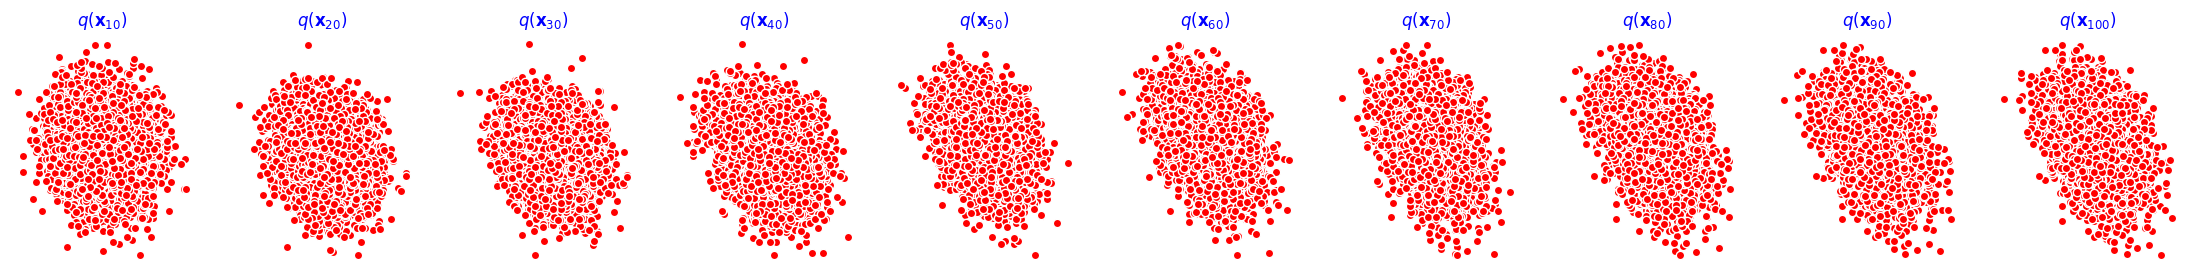

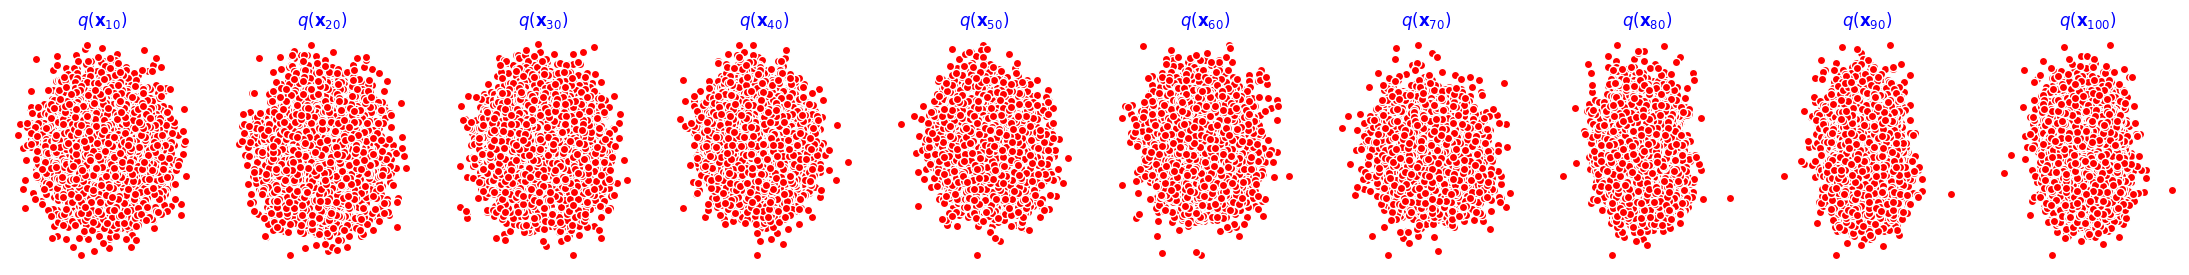

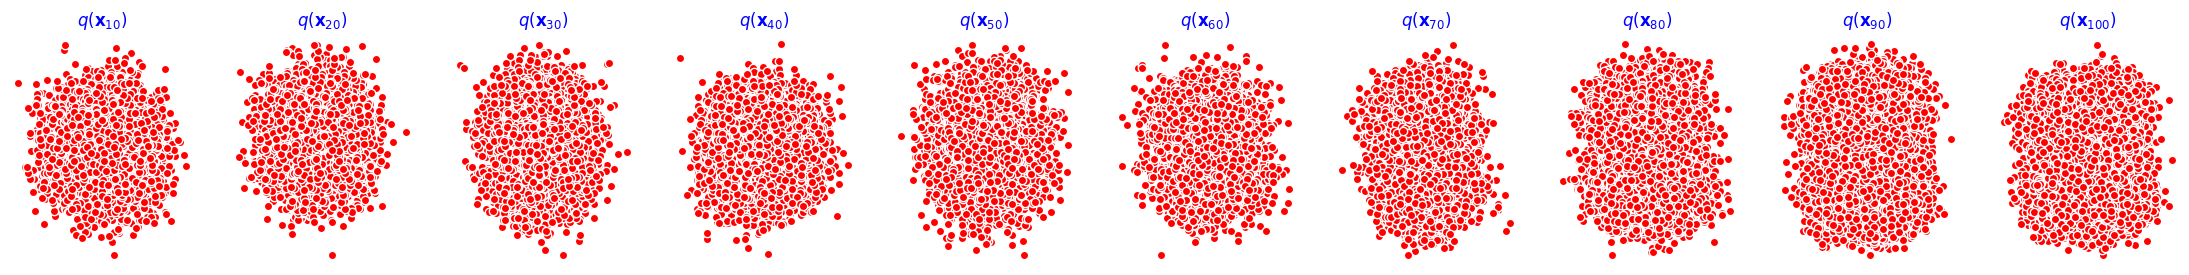

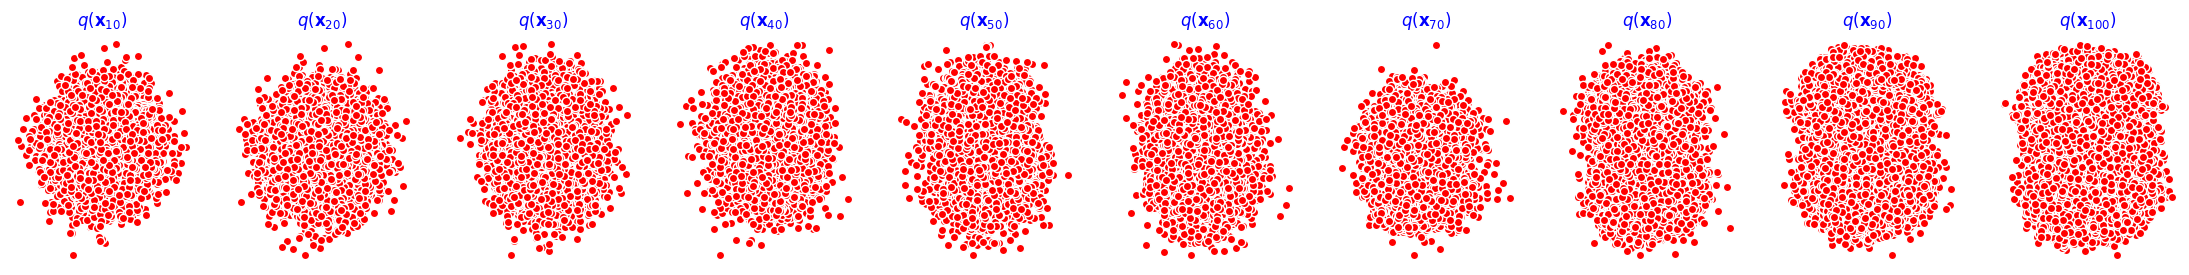

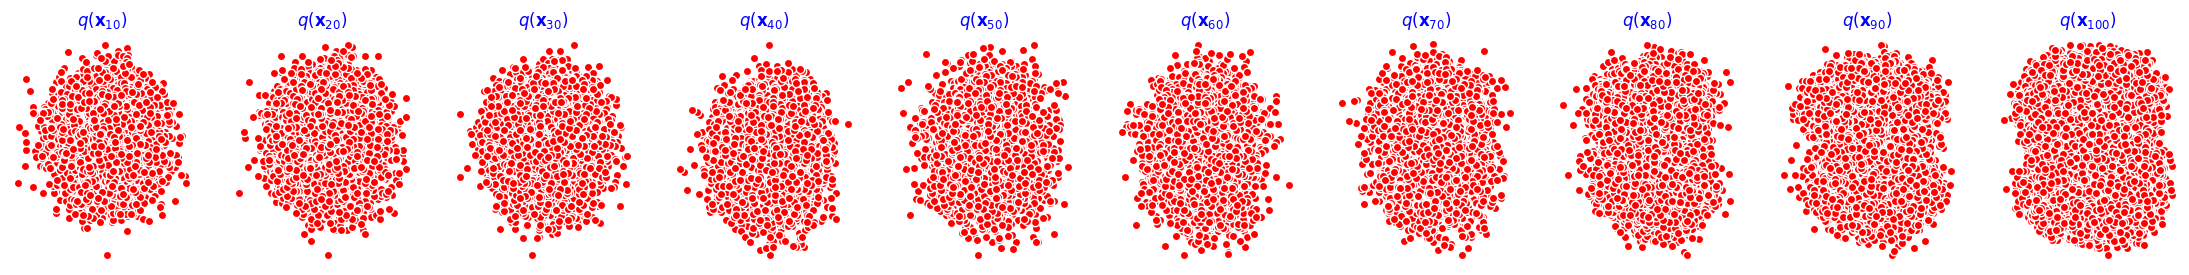

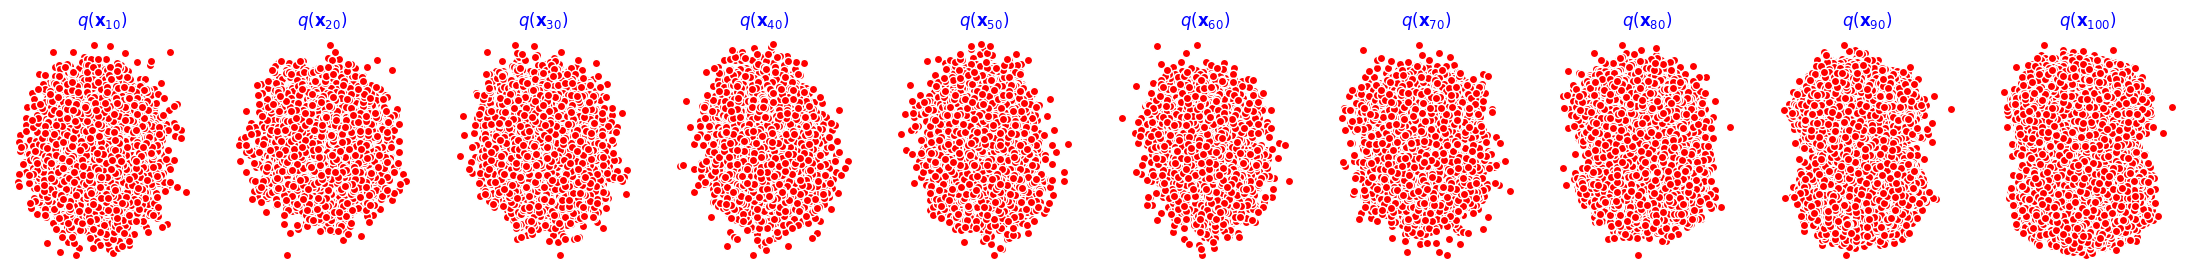

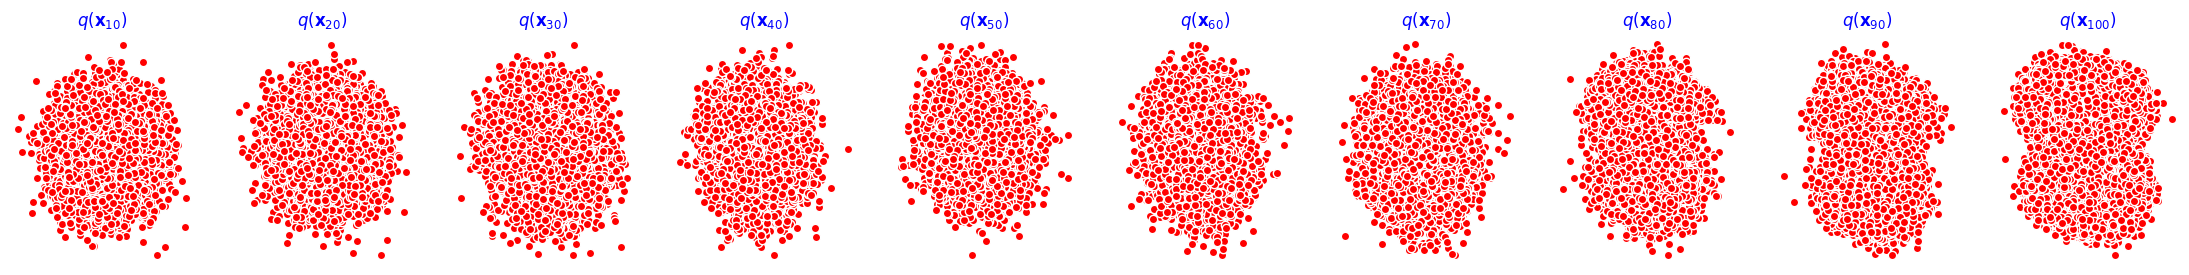

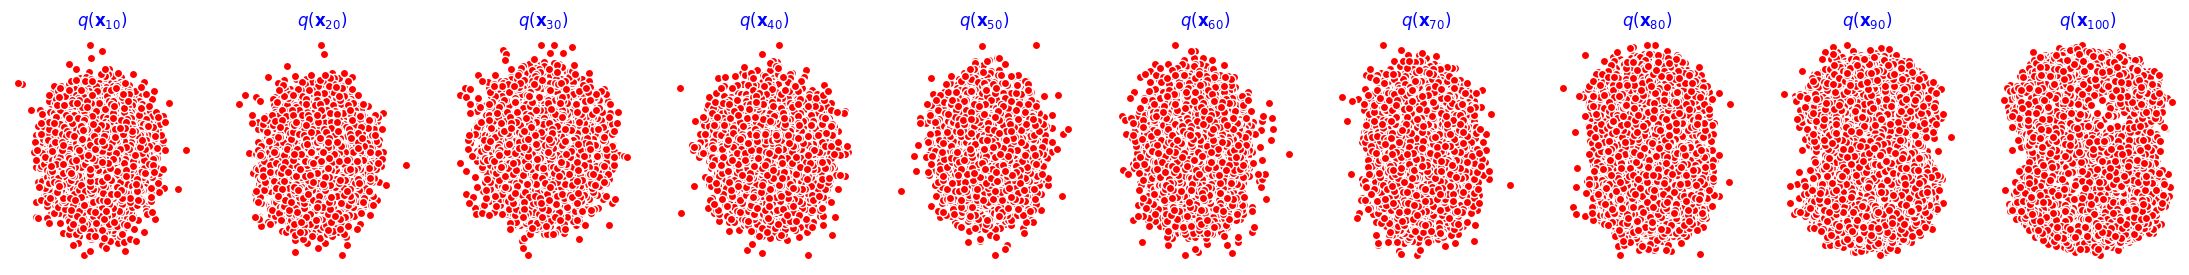

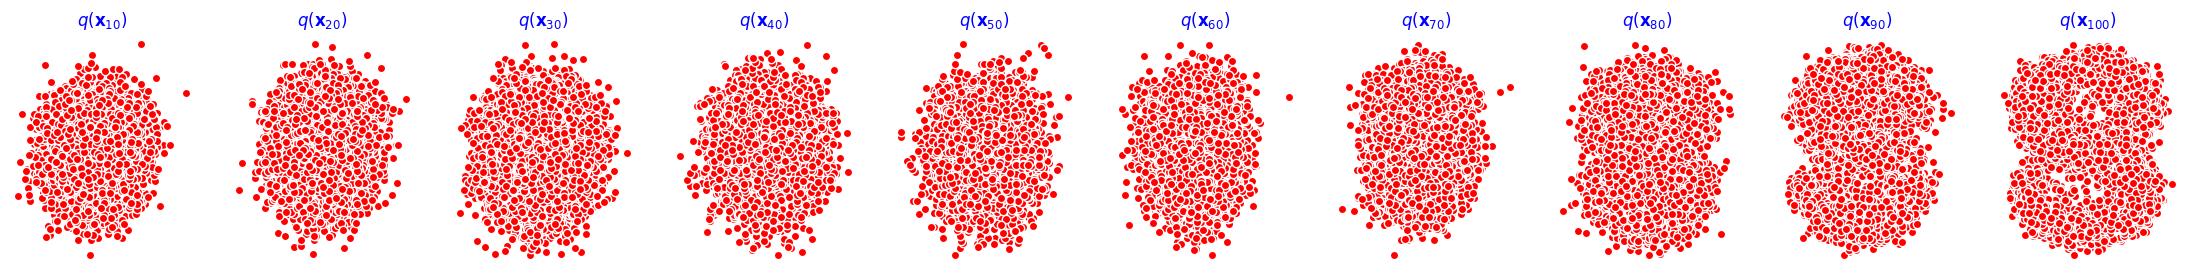

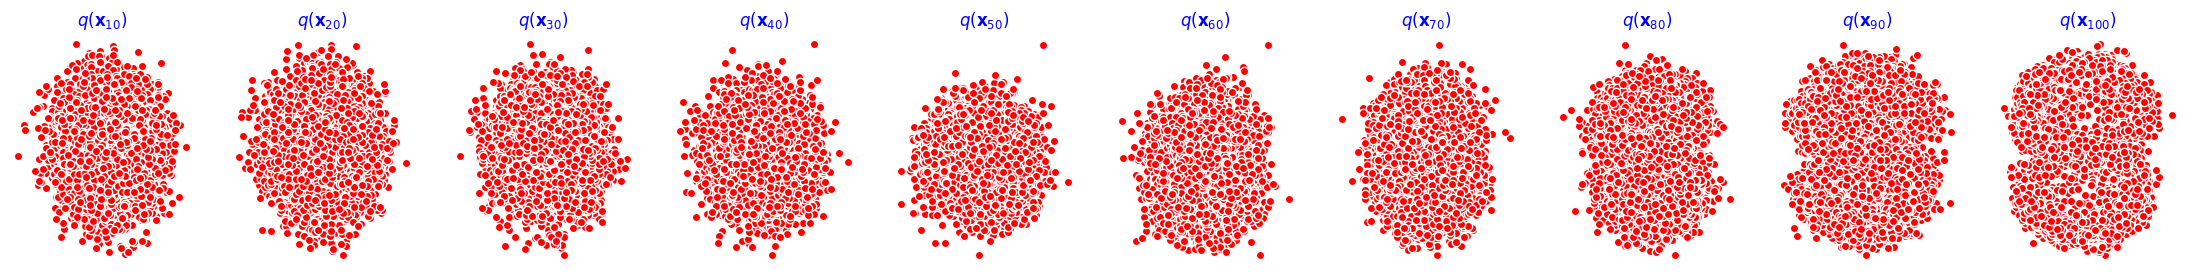

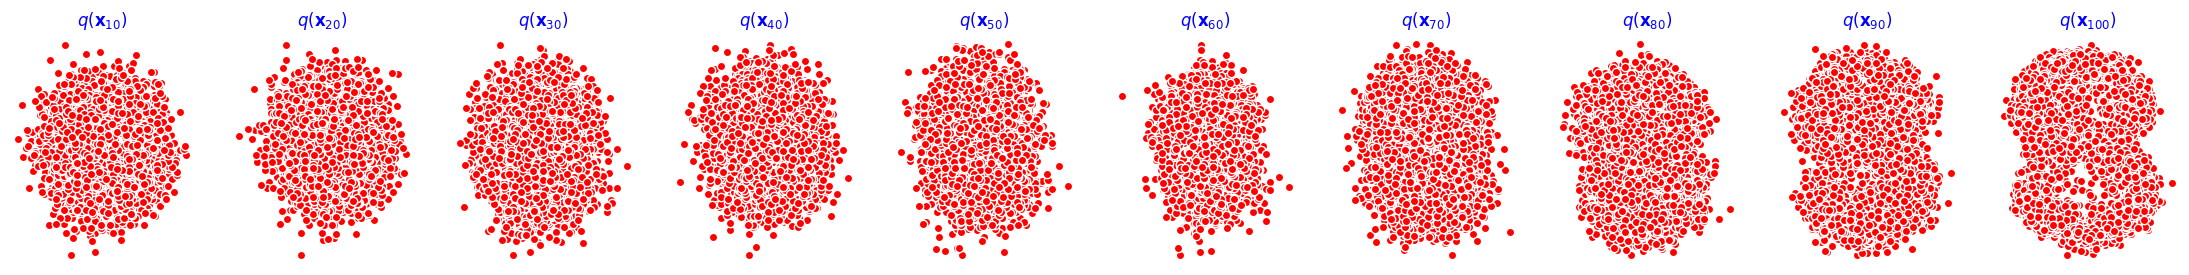

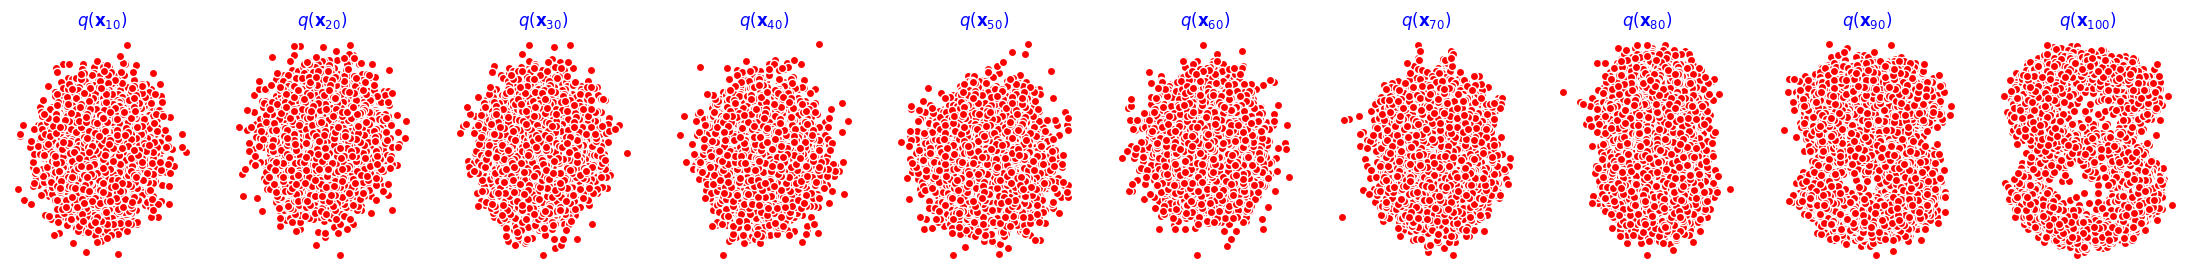

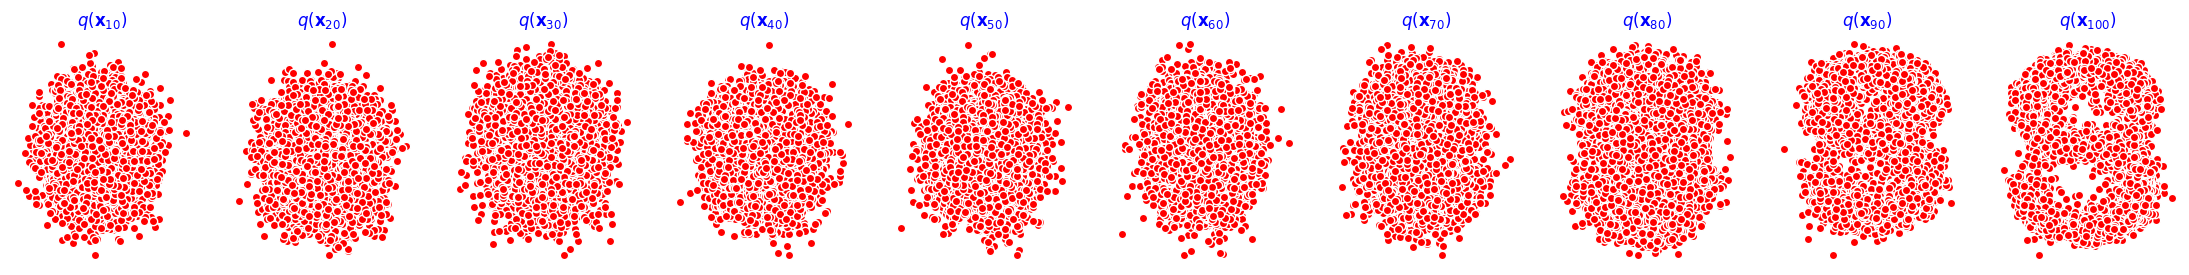

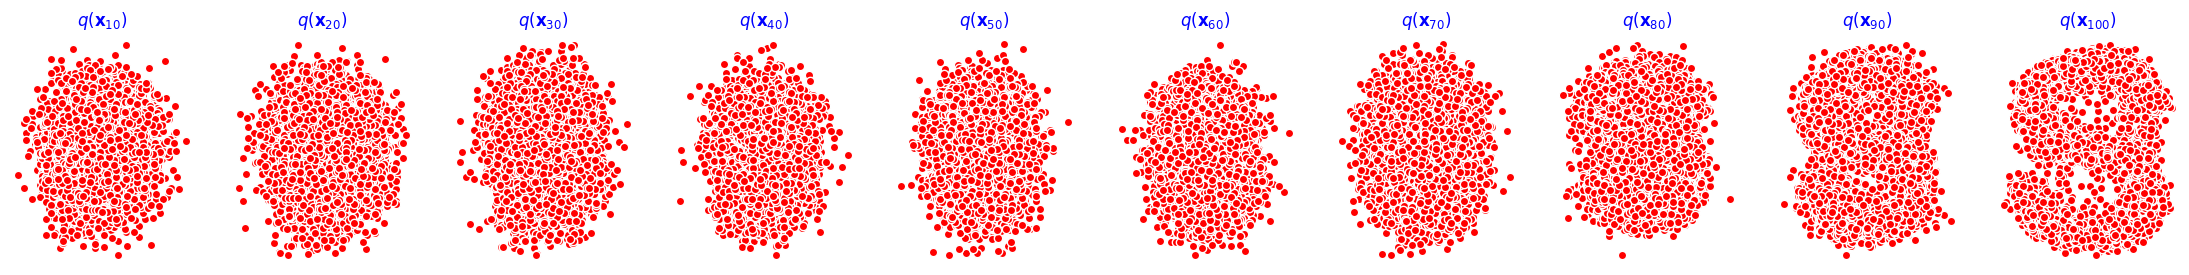

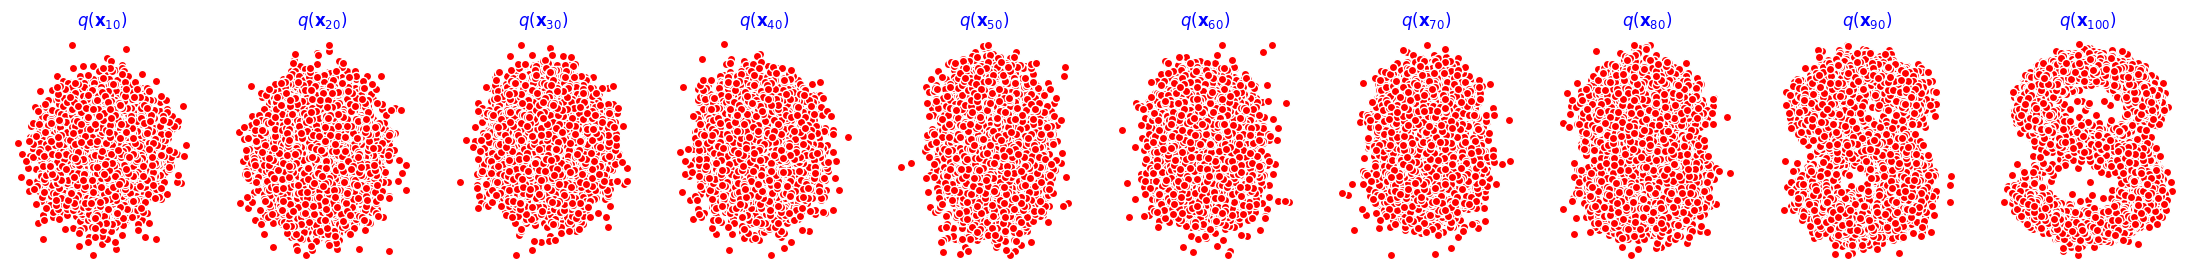

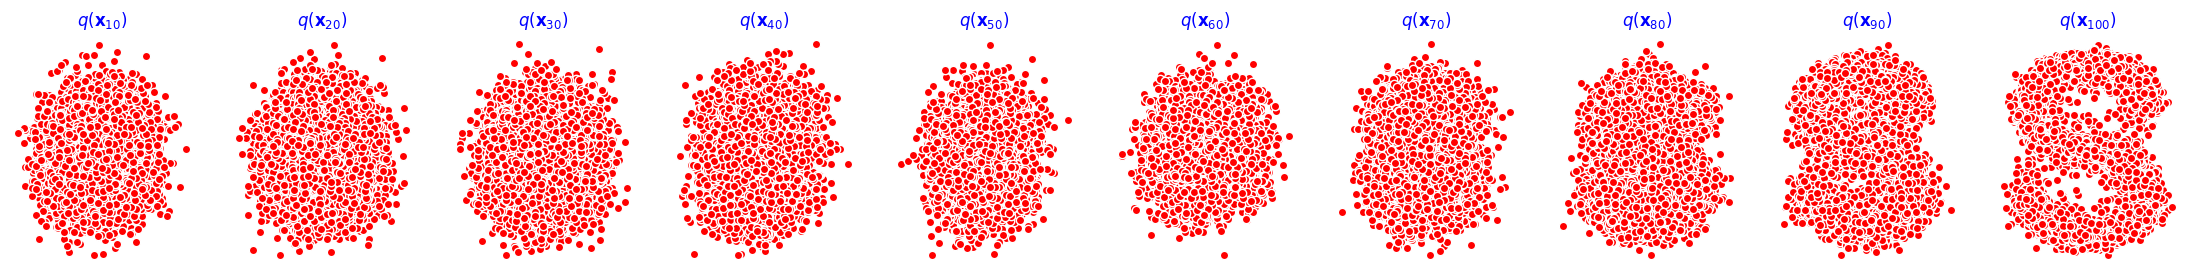

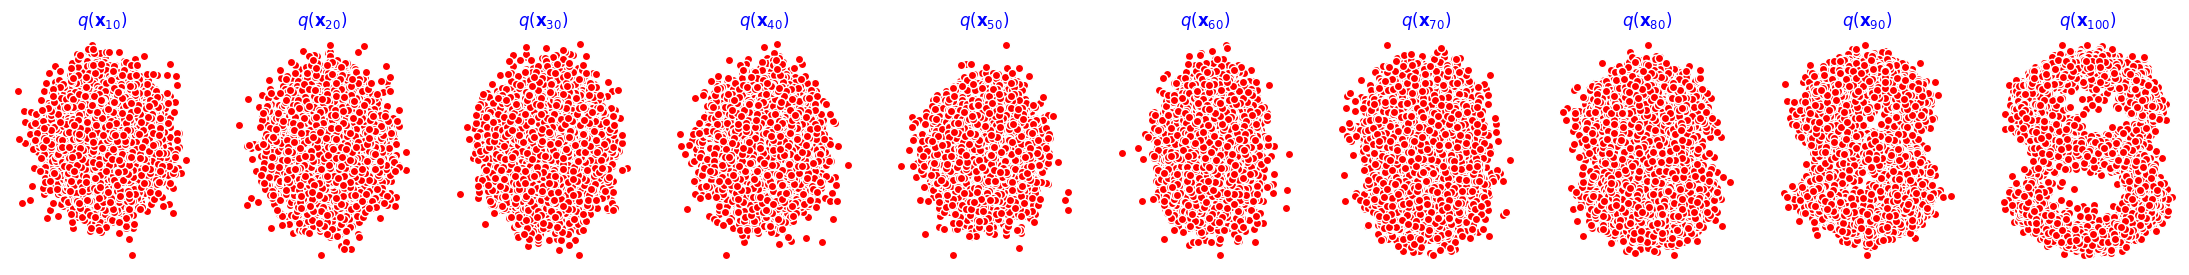

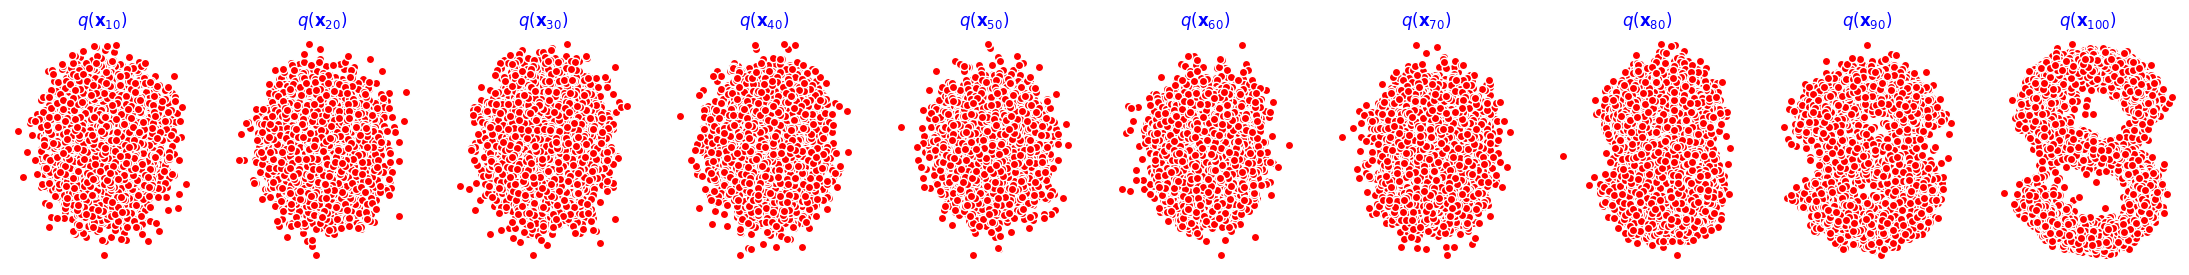

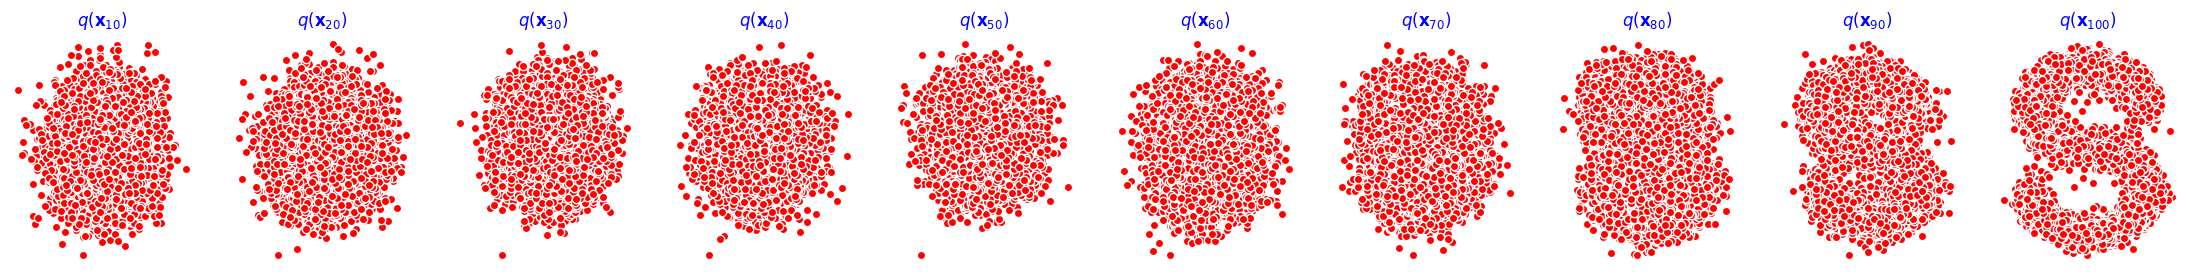

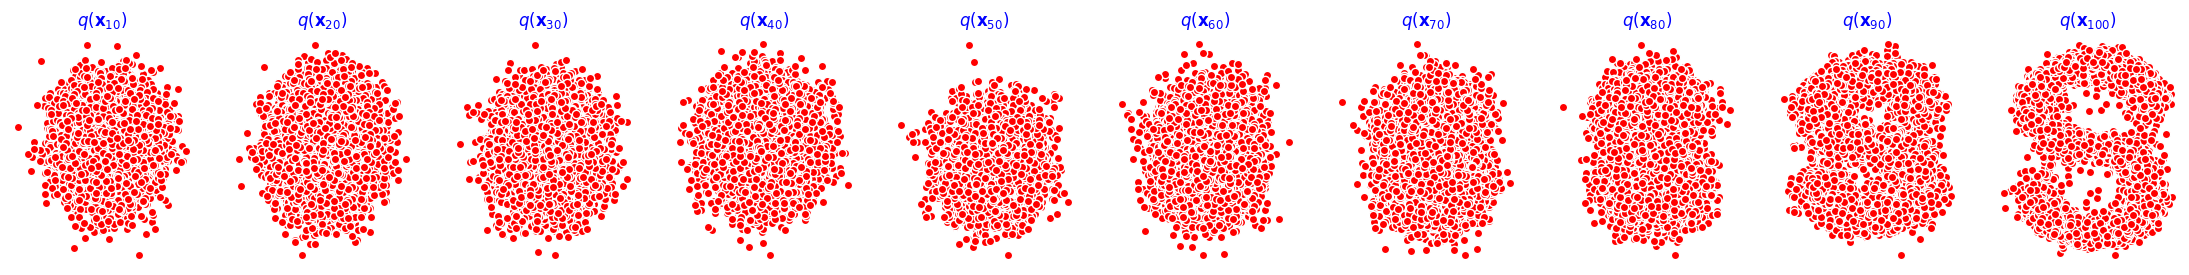

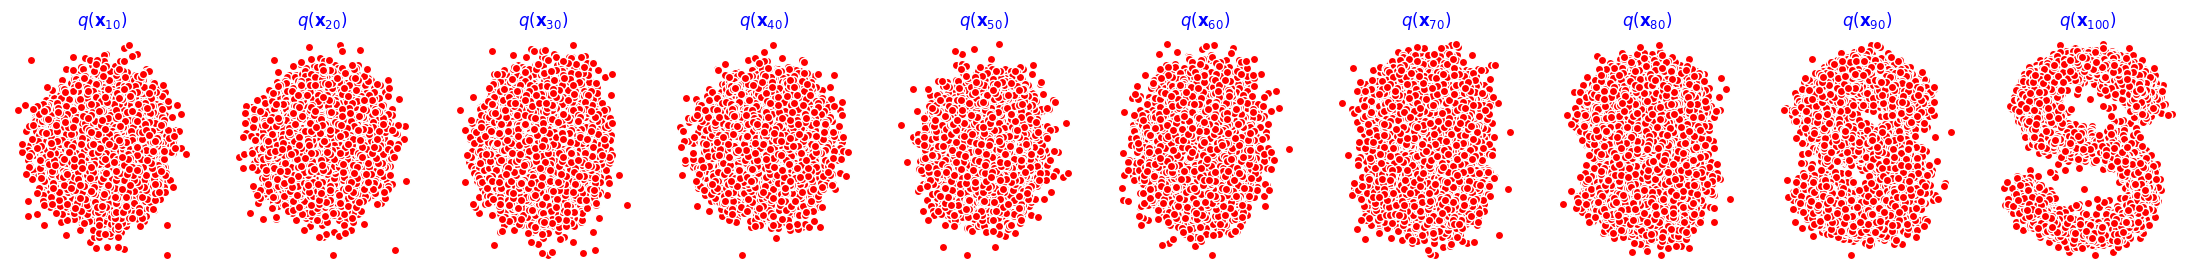

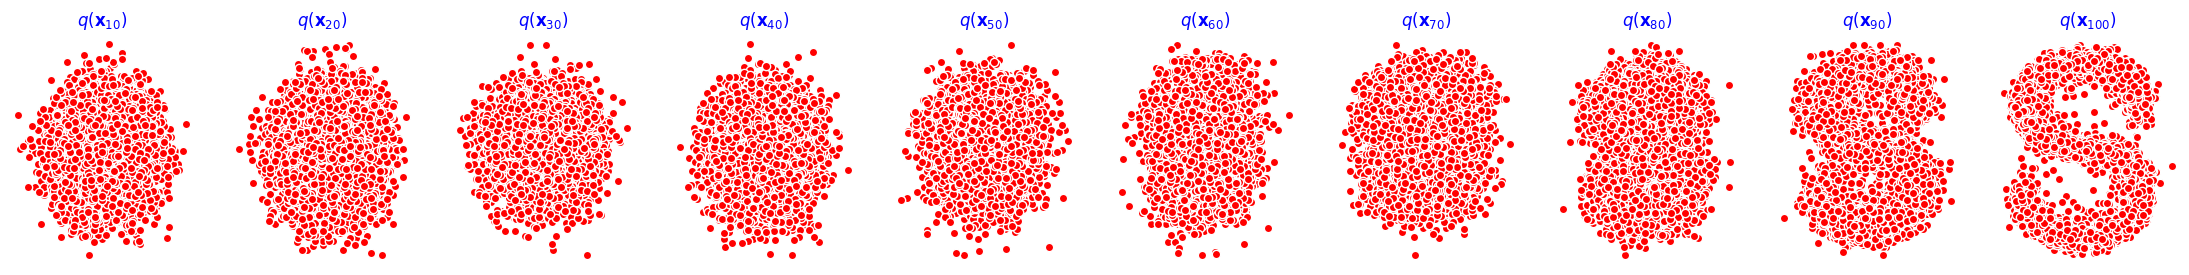

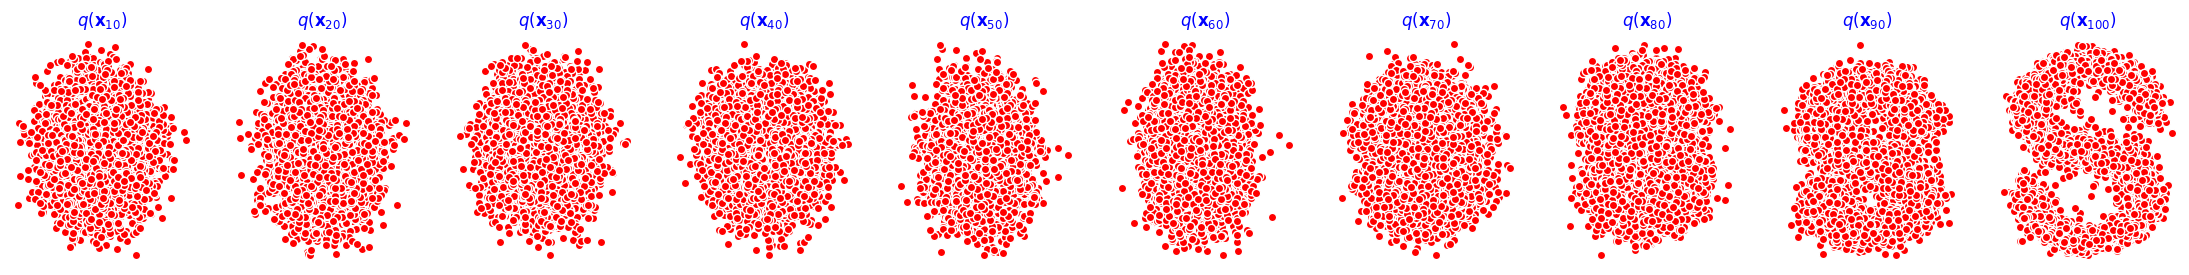

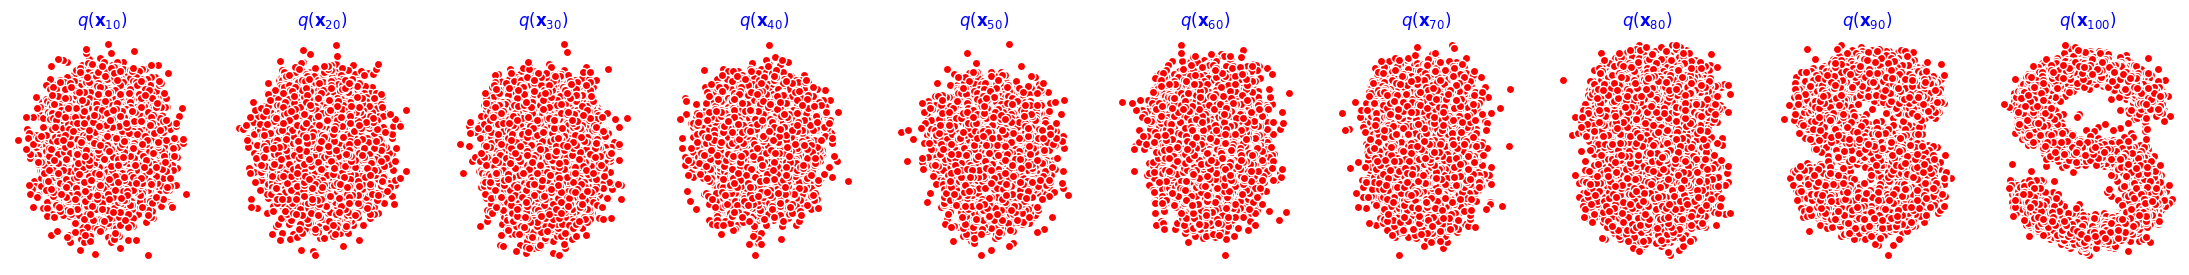

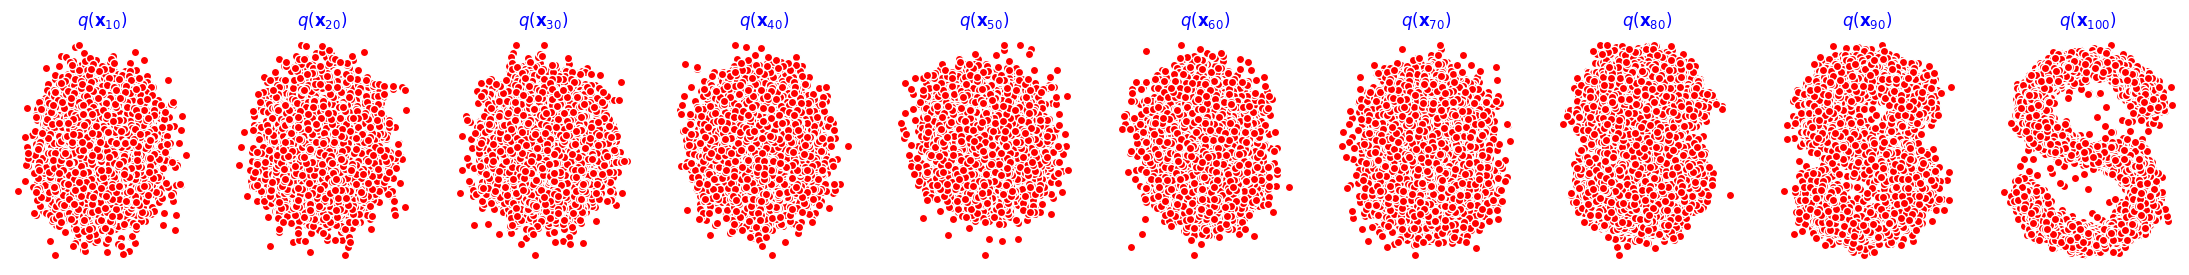

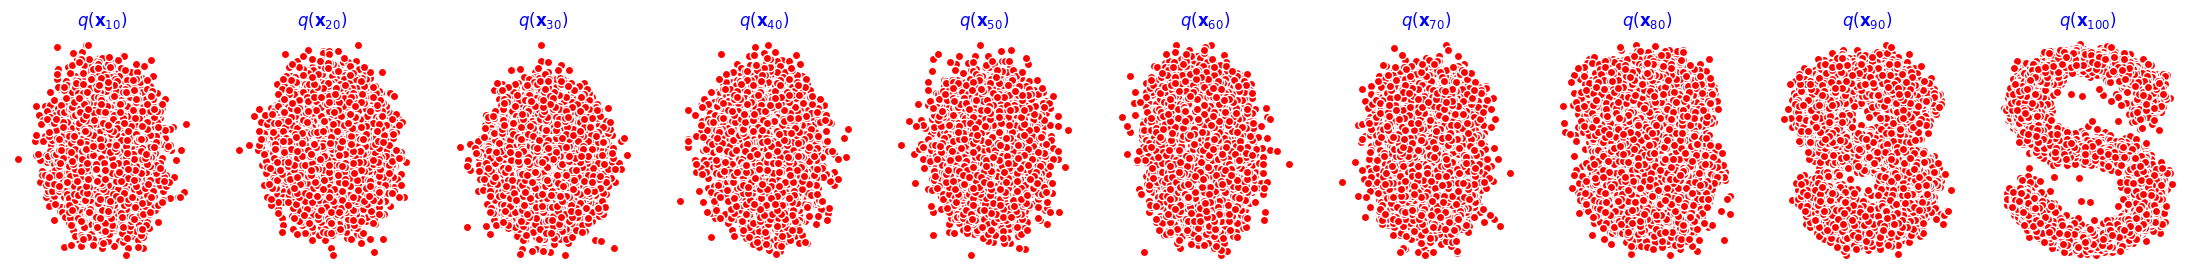

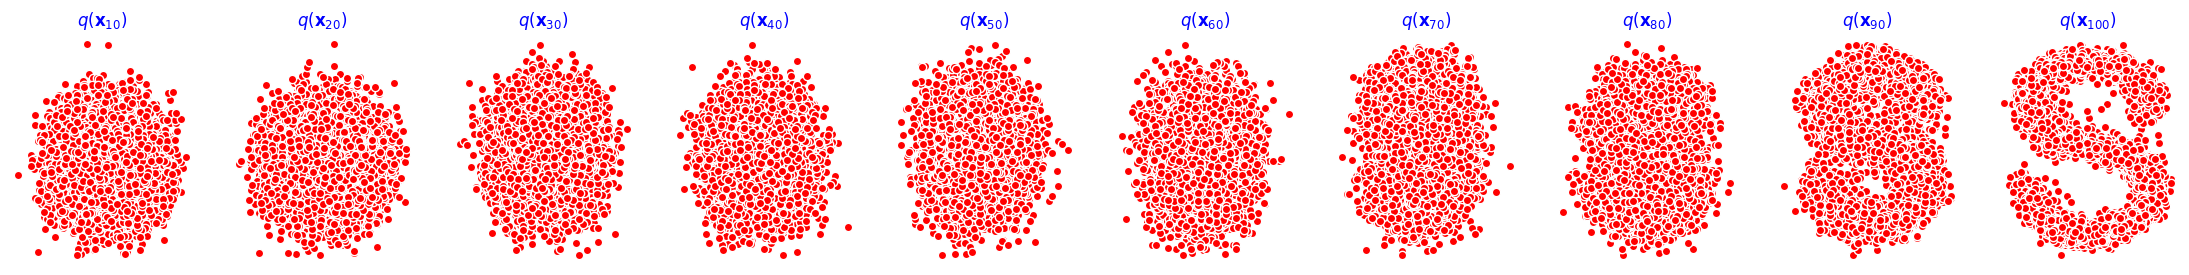

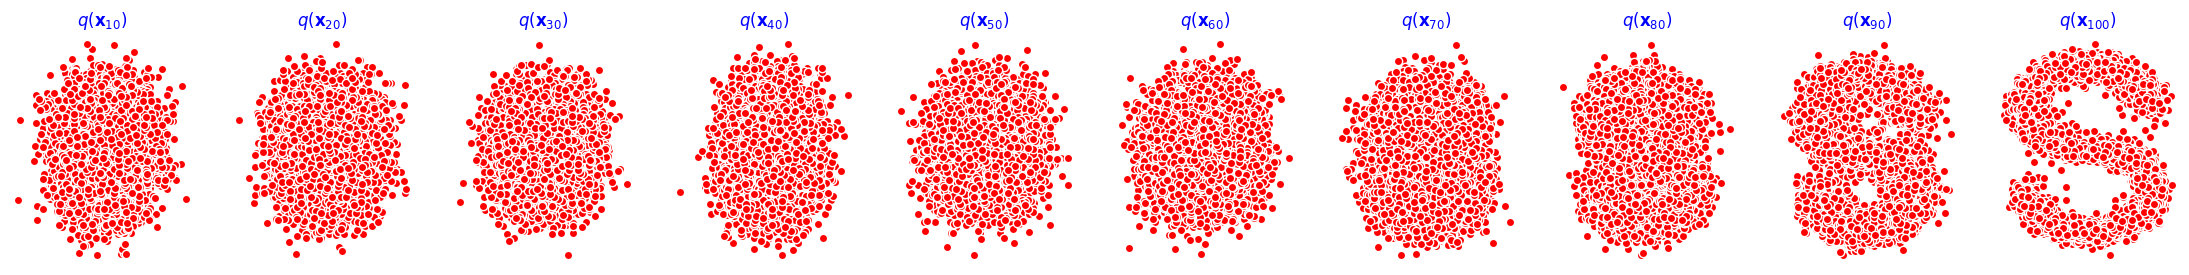

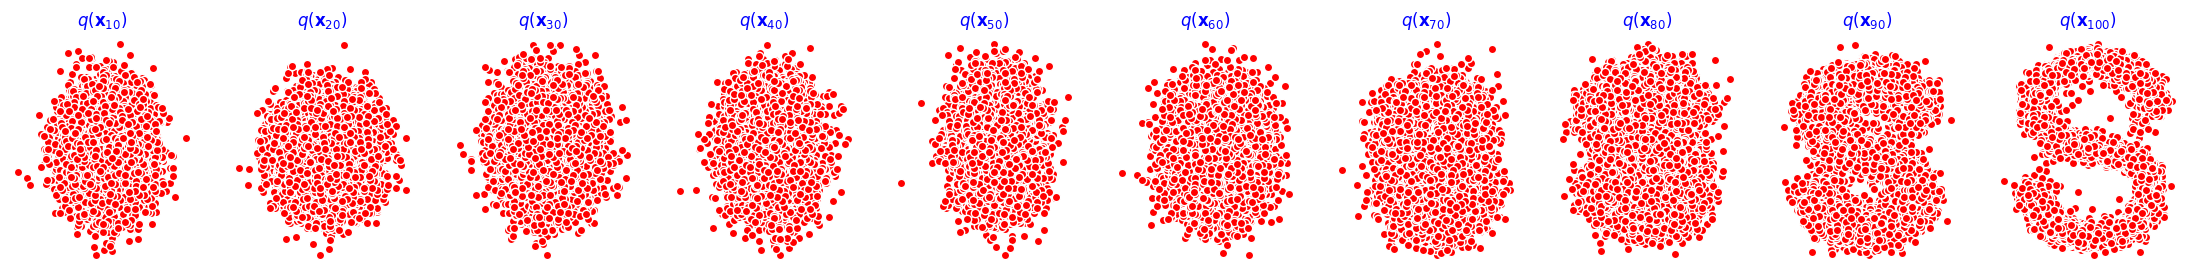

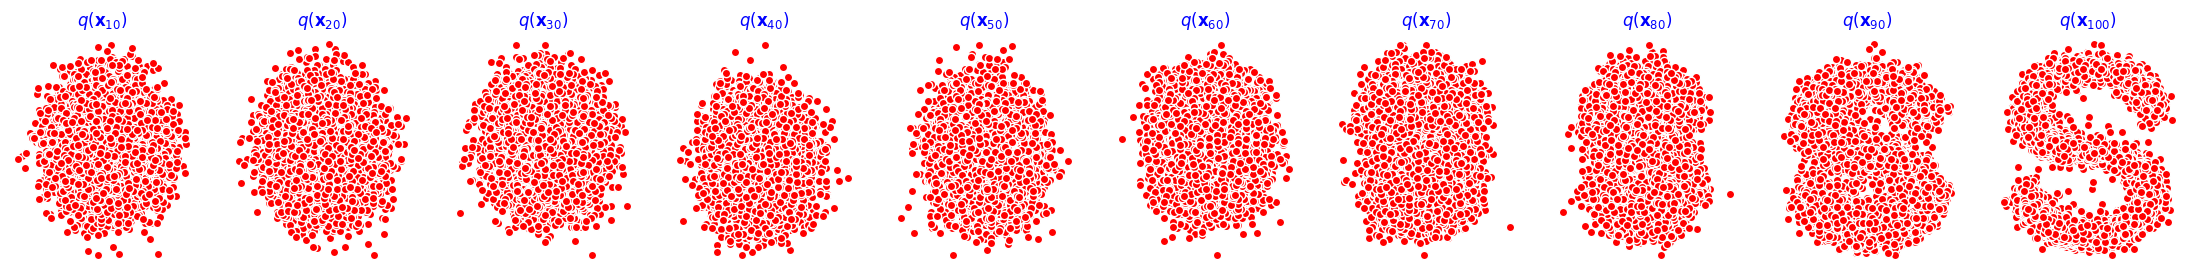

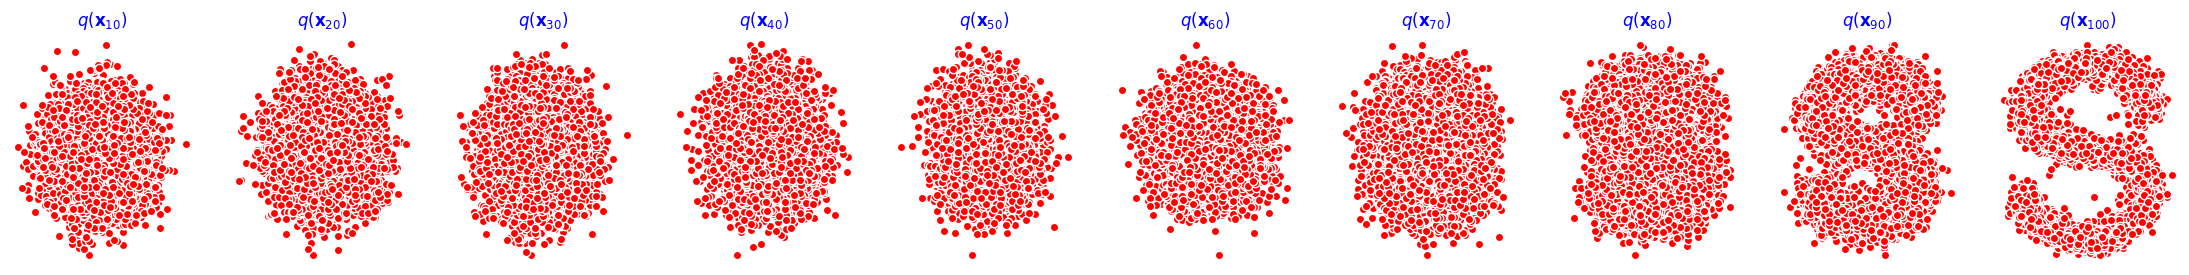

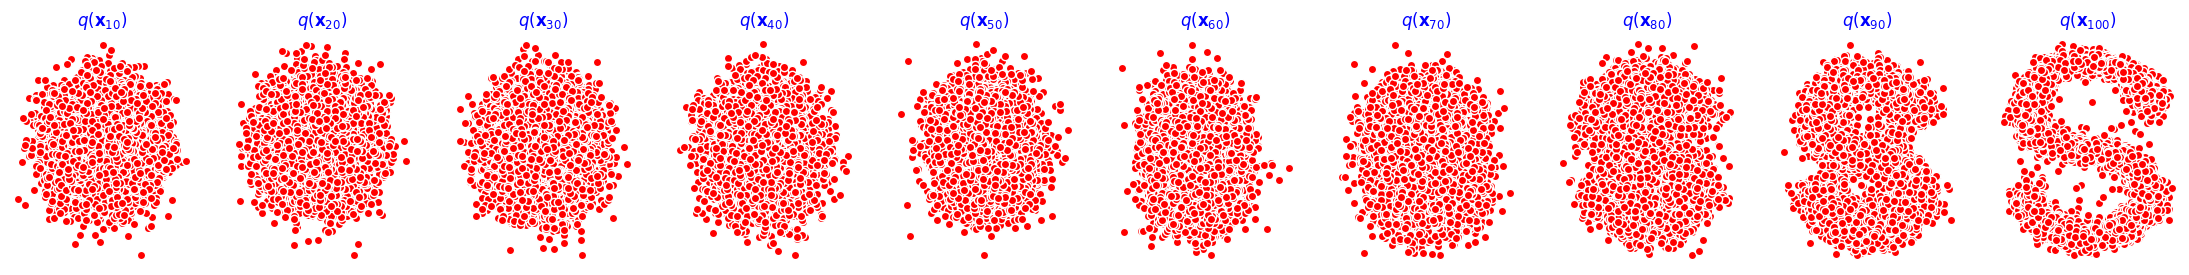

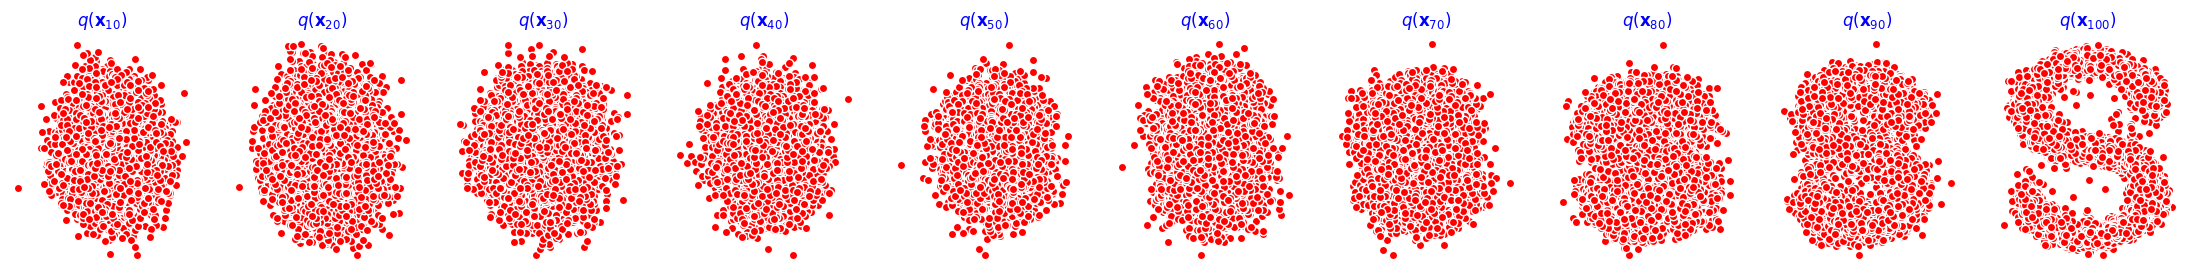

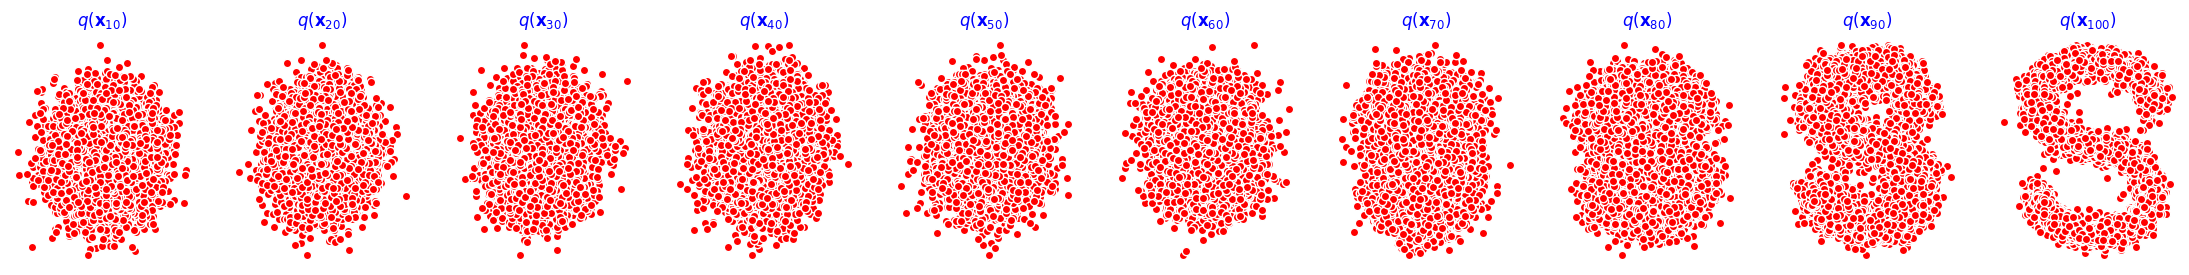

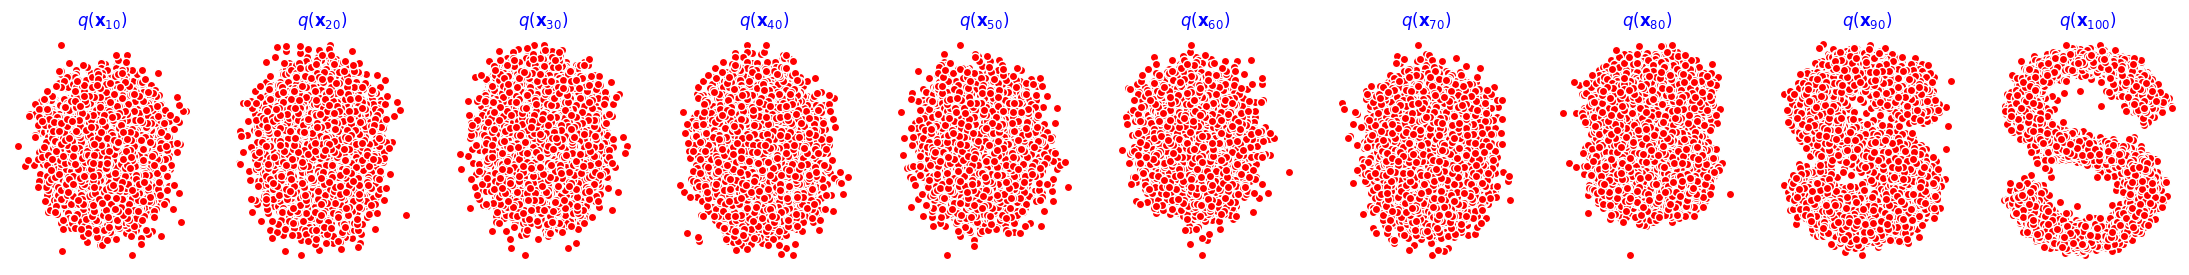

In [8]:
seed = 1234

class EMA():
    """构建一个参数平滑器(后来发现没必要)"""
    def __init__(self,mu=0.01):
        self.mu = mu
        self.shadow = {}
        
    def register(self,name,val):
        self.shadow[name] = val.clone()
        
    def __call__(self,name,x):
        assert name in self.shadow
        new_average = self.mu * x + (1.0-self.mu)*self.shadow[name]
        self.shadow[name] = new_average.clone()
        return new_average

"""
将数据集中的样本传入模型，计算loss后反向传播更新模型参数。
- 对样本的时间嵌入放在模型中完成。
- 模型的能力是输出噪声（形状与样本相同）

"""
    
print('Training model...')
batch_size = 128
dataloader = torch.utils.data.DataLoader(dataset,
                                         batch_size=batch_size,
                                         shuffle=True)
num_epoch = 4000
plt.rc('text',color='blue')

model = MLPDiffusion(num_steps)  # 输出维度是2，输入是x和step

optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)  # 0.001

for t in range(num_epoch):

    for _ ,batch_x in enumerate(dataloader):
        # 计算损失
        loss = diffusion_loss_fn(model,batch_x,alphas_bar_sqrt,one_minus_alphas_bar_sqrt,num_steps)
        # 梯度清零
        optimizer.zero_grad()
        # 算出梯度，反向传播
        loss.backward()
        # 保持稳定性
        torch.nn.utils.clip_grad_norm_(model.parameters(),1.)
        # 更新模型参数
        optimizer.step()

    # print loss
    if t%100 == 0:
        print(loss)
        # 采样
        x_seq = p_sample_loop(model,dataset.shape,num_steps,betas,one_minus_alphas_bar_sqrt)
        
        fig,axs = plt.subplots(1,10,figsize=(28,3))

        for i in range(1,11):
            cur_x = x_seq[i*10].detach()

            axs[i-1].scatter(
                cur_x[:,0],
                cur_x[:,1],
                color='red',
                edgecolor='white')

            axs[i-1].set_axis_off()
            axs[i-1].set_title('$q(\mathbf{x}_{'+str(i*10)+'})$')

9、动画演示扩散过程和逆扩散过程

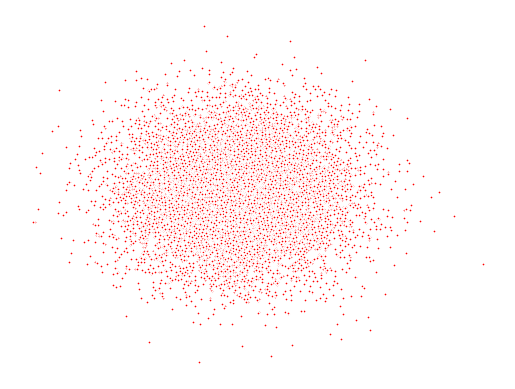

In [9]:
import io
from PIL import Image

imgs = []
for i in range(100):
    plt.clf()
    q_i = q_x(dataset,torch.tensor([i]))
    plt.scatter(q_i[:,0],q_i[:,1],color='red',edgecolor='white',s=5);
    plt.axis('off');
    
    img_buf = io.BytesIO()
    plt.savefig(img_buf,format='png')
    img = Image.open(img_buf)
    imgs.append(img)

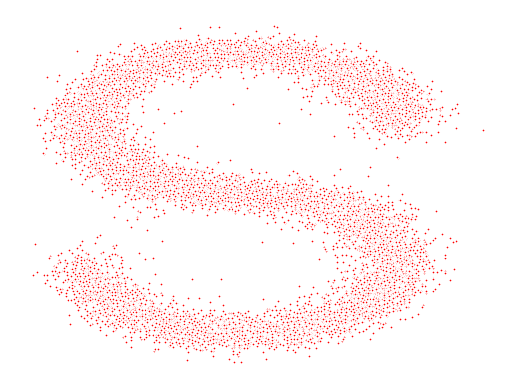

In [10]:
reverse = []
for i in range(100):
    plt.clf()
    cur_x = x_seq[i].detach()
    plt.scatter(cur_x[:,0],cur_x[:,1],color='red',edgecolor='white',s=5);
    plt.axis('off')
    
    img_buf = io.BytesIO()
    plt.savefig(img_buf,format='png')
    img = Image.open(img_buf)
    reverse.append(img)

In [11]:
imgs = imgs +reverse

In [12]:
imgs[0].save("./diffusion.gif",format='GIF',append_images=imgs,save_all=True,duration=100,loop=0)